# Movement on maps: Beyond the travel record
Look at this map.... Did you notice that there changes along the x axis?
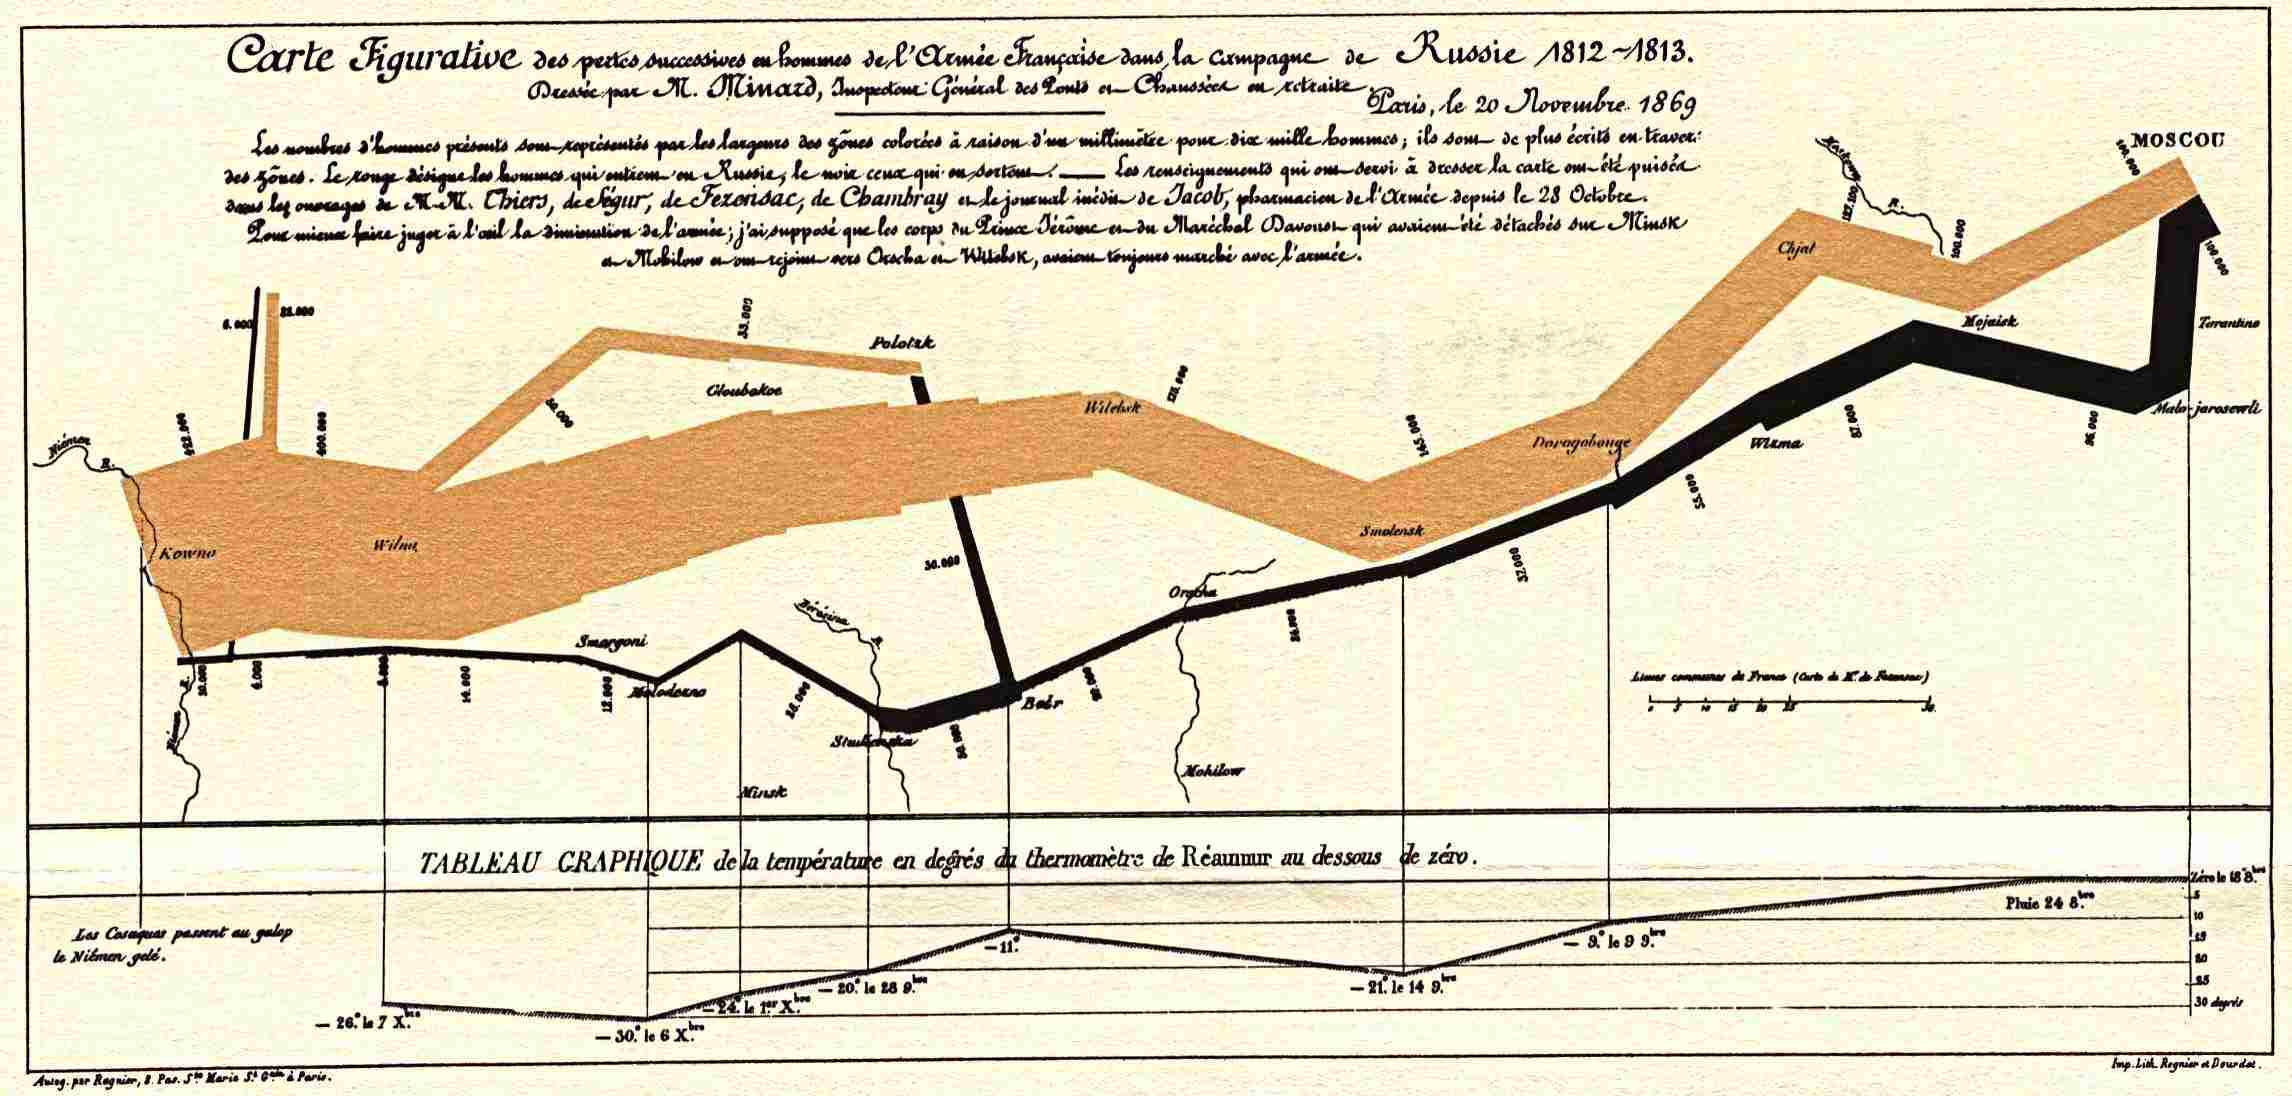
_Charles Joseph Minard’s visualization of Napoleon’s Russian campaign of 1812, (Tufte, 1983)_




# Content
-   Definition and purpose of flow maps
-   Different types of flow maps (charts)
-   Cartographic design principles (suggestions and limitations)
-   Examples in real world data: Fluvial Engineering


# Definition
It is a type of thematic map, with the main purpose of represent, with the purpose of representing movement.
For some author (Dodge et al., 2008), is a kind of hybrid map: a base map with flow diagram. 

Common characteristics in visual variables:

- **Shape:** Dot and lines
- **Orientation, Size and Colour:** Depends on the attribute of the data, _weight and frequency_


# Types

- Sankey Diagrams
- Chords
- Origin Destination (OD)- Flow maps
- Streamlines, streaklines and Pathlines


In [ ]:
import plotly.graph_objects as go
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

flight_paths = []
for i in range(len(df_flight_paths)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )


In [11]:
# OD Matrix, available on https://plotly.com/python/lines-on-maps/
print('OD Dataset size {}'.format(df_flight_paths.shape))
df_flight_paths.head()

OD Dataset size (178, 8)


start_lat  start_lon    end_lat     end_lon airline airport1 airport2  cnt
0  32.895951 -97.037200  35.040222 -106.609194      AA      DFW      ABQ  444
1  41.979595 -87.904464  30.194533  -97.669872      AA      ORD      AUS  166
2  32.895951 -97.037200  41.938874  -72.683228      AA      DFW      BDL  162
3  18.439417 -66.001833  41.938874  -72.683228      AA      SJU      BDL   56
4  32.895951 -97.037200  33.562943  -86.753550      AA      DFW      BHM  168

In [3]:
fig.update_layout(title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)
fig.show()

# Vector Fields Visualization

- **Streamlines:**  Line which connects velocity vectors at an instance in time. It is like a snapshot.
- **Streakline:** A curved line formed by a string of fluid particles which have passed through a certain _point_.
- **Pathlines:** Also called particle tracking, it is a path which a fluid particle traces

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)
# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

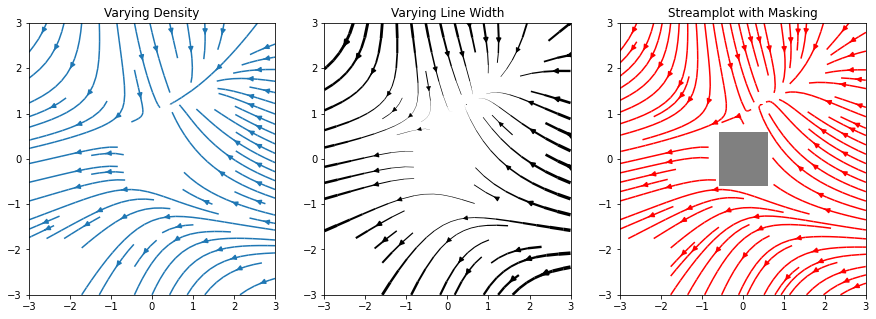

In [58]:
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(nrows=1, ncols=3)
#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')
#  Varying line width along a streamline
ax1 = fig.add_subplot(gs[0, 1])
lw = 5*speed / speed.max()
ax1.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax1.set_title('Varying Line Width')
# With a obstacle "Masking"
ax2 = fig.add_subplot(gs[0,2])
ax2.streamplot(X, Y, U, V, color='r')
ax2.set_title('Streamplot with Masking')
ax2.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
plt.show()

# Suggestions and Limitations
based on Jenny et al., 2018 and Andrienko et al., 2008

- **Curved vs. straight lines:** People prefer circular arcs for graphs drawings. Less likely to create ambiguous analyses
- **Arrows vs. tapered flows:** There is no consensus on which is better, it depends on the amount of data and the importance of the destination for the map.
- **Flows between areas vs. flows between nodes:** Was found that flows between clear nodes in OD instead of non amarked areas result in lower error rates.

**Geometry design tips, available on Jenny et al., 2018)**
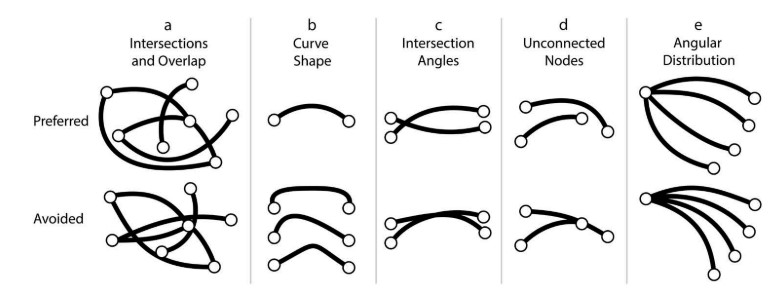



## Current limitations and methodologies available on Andrienko et al., 2008
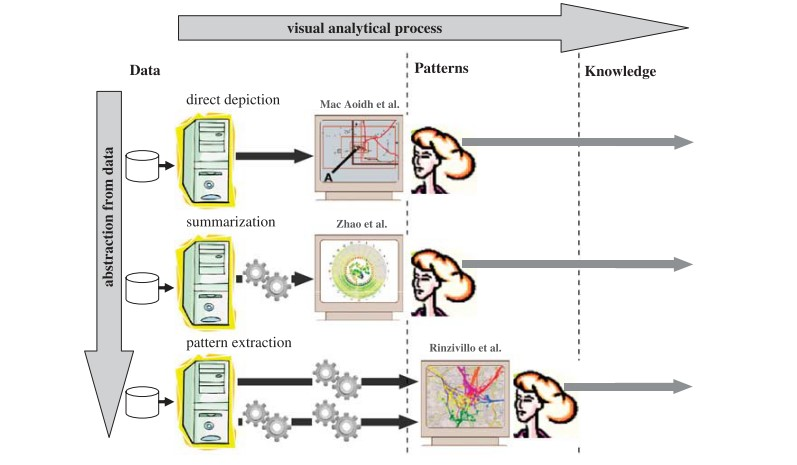

# An Application in Fluvial Engineering
Groynes in fluvial erosion, image avaiable on Buczyńska et al., 2018
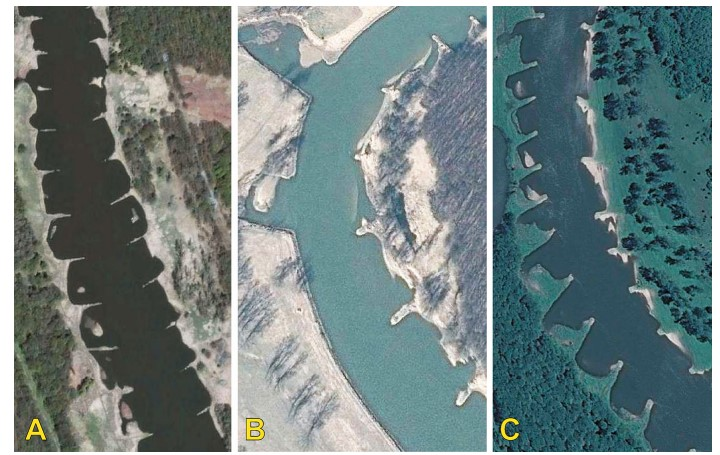

In [46]:
%%html
<iframe src="https://aamontalvo.github.io/MagangueEsp2/index.html" width="900" height="800"></iframe>

# References


- Andrienko, G., Andrienko, N., Dykes, J., Fabrikant, S.I. & Wachowicz, M. (2008) Geovisualization of Dynamics, Movement and Change: Key Issues and Developing Approaches in Visualization Research. Information Visualization, 7(3-4), 173–180. Available from: https://doi.org/10.1057/ivs.2008.23.
- Buczyńska, E., Szlauer-Łukaszewska, A., Czachorowski, S. & Buczyński, P. (2018) Human impact on large rivers: the influence of groynes of the River Oder on larval assemblages of caddisflies (Trichoptera). Hydrobiologia, 819(1), 177–195. Available from: https://doi.org/10.1007/s10750-018-3636-6.
- Dodge, S., Weibel, R. & Lautenschütz, A.-K. (2008) Towards a taxonomy of movement patterns⁤ // Towards a taxonomy of movement patterns. Available from: https://journals.sagepub.com/doi/epdf/10.1057/PALGRAVE.IVS.9500182 [Accessed 20 March 2023].
- Jenny, B., Stephen, D.M., Muehlenhaus, I., Marston, B.E., Sharma, R. & Zhang, E. et al. (2018) Design principles for origin-destination flow maps. Cartography and Geographic Information Science, 45(1), 62–75. Available from: https://doi.org/10.1080/15230406.2016.1262280.
- Tufte, E. (1983) The visual display of quantitive information. Graphic Press.
